<a href="https://colab.research.google.com/github/ansal1202/Vehicle-Price-Prediction/blob/main/%E6%B1%BD%E8%BB%8A%E5%83%B9%E6%A0%BC%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Download kaggle data in Google Colab
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [1]:
#下載壓縮檔
! kaggle datasets download -d 'syedanwarafridi/vehicle-sales-data'
#建立一個資料夾
! mkdir vehicle-sales
#將壓縮檔解壓縮進資料夾
! unzip vehicle-sales-data.zip -d vehicle-sales

Dataset URL: https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data
License(s): MIT
100% 18.8M/18.8M [00:01<00:00, 19.3MB/s]
100% 18.8M/18.8M [00:01<00:00, 10.3MB/s]
Archive:  vehicle-sales-data.zip
  inflating: vehicle-sales/car_prices.csv  


In [25]:
#載入資料集
import pandas as pd
df = pd.read_csv('vehicle-sales/car_prices.csv')
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


**資料概況**

* year: 車輛的製造年份
* make: 車輛的品牌或製造商
* model: 車輛型號
* trim: 車輛型號的附加名稱
* body: 車輛的車身類型（例如 SUV、轎車）
* transmission: 車輛變速器的類型（手排、自排）
* vin: 車輛識別碼，每輛車的唯一代碼
* state: 車輛的註冊地(美國的州)
* condition: 車輛狀況，可能依等級進行評級。
* odometer: 車輛里程數
* color: 外觀顏色
* interior: 內裝顏色
* seller: 車輛的銷售實體。
* mmr: Manheim Market Report，車輛的估計市場價值
* sellingprice: 車輛的售價
* saledate: 車輛的銷售日期和時間

In [3]:
# 確認資料型態
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [9]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,558837.000000,558837.000000,558837.000000,558837.000000
mean,2010.038927,30.425482,68308.526066,13769.291180,13611.302736
std,3.966864,13.366270,53401.401863,9679.643716,9749.404460
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,22.000000,28359.000000,7100.000000,6900.000000
50%,2012.000000,34.000000,52245.000000,12250.000000,12100.000000
75%,2013.000000,41.000000,99103.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [7]:
#查看個數
df.nunique()

,0
year,34
make,96
model,973
trim,1963
body,87
transmission,4
vin,550297
state,64
condition,41
odometer,172278


In [5]:
# 檢查是否有缺失值
df.isnull().any()

,0
year,False
make,True
model,True
trim,True
body,True
transmission,True
vin,True
state,False
condition,True
odometer,True


In [3]:
# 檢查缺失值數量
df.isna().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,4
state,0
condition,11820
odometer,94


# 資料清理
缺失值填補

In [18]:
#transmission缺失值較多，檢查其資料分布來決定填補方式
value_counts = df['transmission'].value_counts()
print(value_counts)

transmission
automatic    538975
manual        19834
sedan            16
Sedan            12
Name: count, dtype: int64


In [26]:
#大部分為automatic，少數為manual，其餘數量低到可忽略不計
#採依比例的方式來填補
from collections import defaultdict
import numpy as np

# 計算比例
transmission_probs = df['transmission'].value_counts(normalize=True)
# 排除 NaN
transmission_probs = transmission_probs.dropna()

# 隨機填補缺失值
missing_indices = df['transmission'][df['transmission'].isna()].index
df.loc[missing_indices, 'transmission'] = np.random.choice(
    transmission_probs.index, #隨機選擇
    size=len(missing_indices), #依類別的比例進行加權隨機選擇
    p=transmission_probs.values #缺失值被隨機填補
)

In [27]:
#將其他非數值欄位的缺失值，以眾數填補
df['make'] = df['make'].fillna(df['make'].mode()[0])
df['model'] = df['model'].fillna(df['model'].mode()[0])
df['trim'] = df['trim'].fillna(df['trim'].mode()[0])
df['body'] = df['body'].fillna(df['body'].mode()[0])
df['vin'] = df['vin'].fillna(df['vin'].mode()[0])
df['color'] = df['color'].fillna(df['color'].mode()[0])
df['interior'] = df['interior'].fillna(df['interior'].mode()[0])
df['saledate'] = df['saledate'].fillna(df['saledate'].mode()[0])



In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

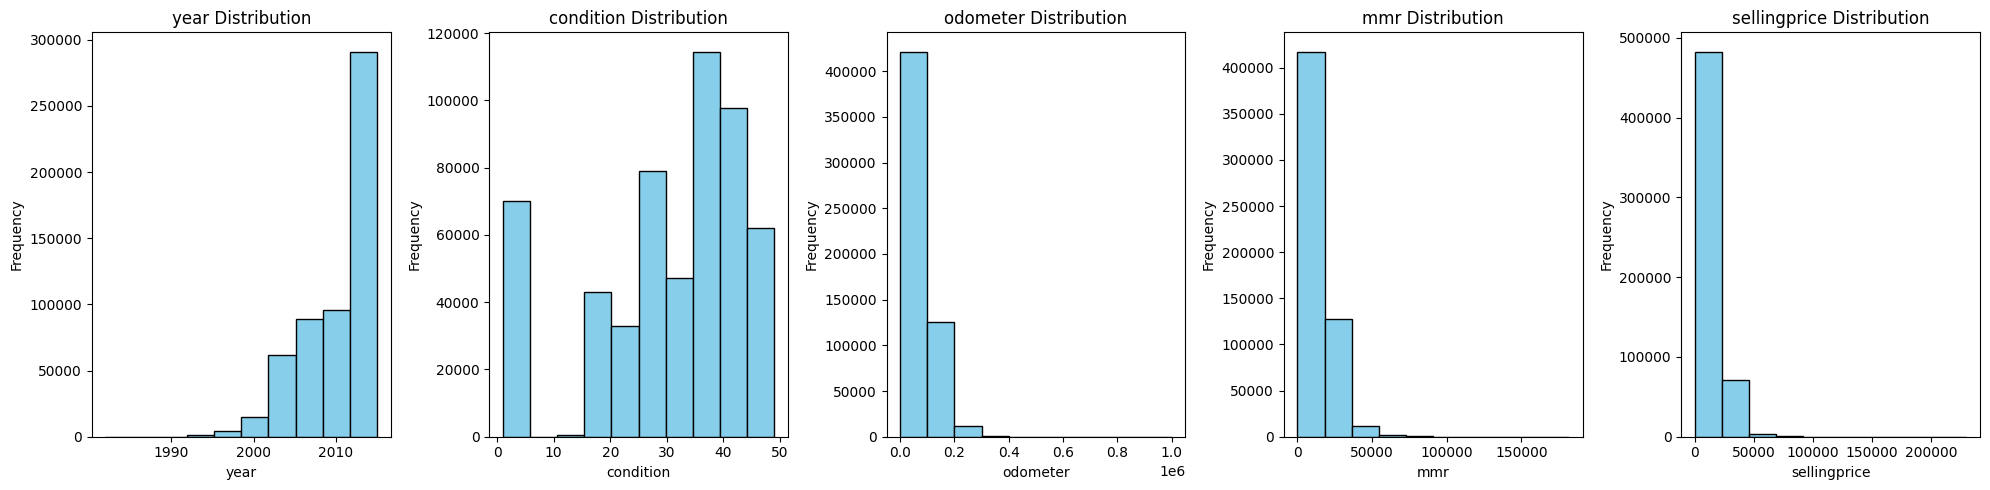

In [29]:
#查看數值欄位的分布狀況
columns = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
# 繪製多個直方圖
plt.figure(figsize=(20, 5))
for i, column in enumerate(columns, 1):
    plt.subplot(1, len(columns), i)
    plt.hist(df[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [30]:
#由於數值不是常態分佈，因此採眾數填補
df['condition'] = df['condition'].fillna(df['condition'].mode()[0])
df['odometer'] = df['odometer'].fillna(df['odometer'].mode()[0])
df['mmr'] = df['mmr'].fillna(df['mmr'].mode()[0])
df['sellingprice'] = df['sellingprice'].fillna(df['sellingprice'].mode()[0])

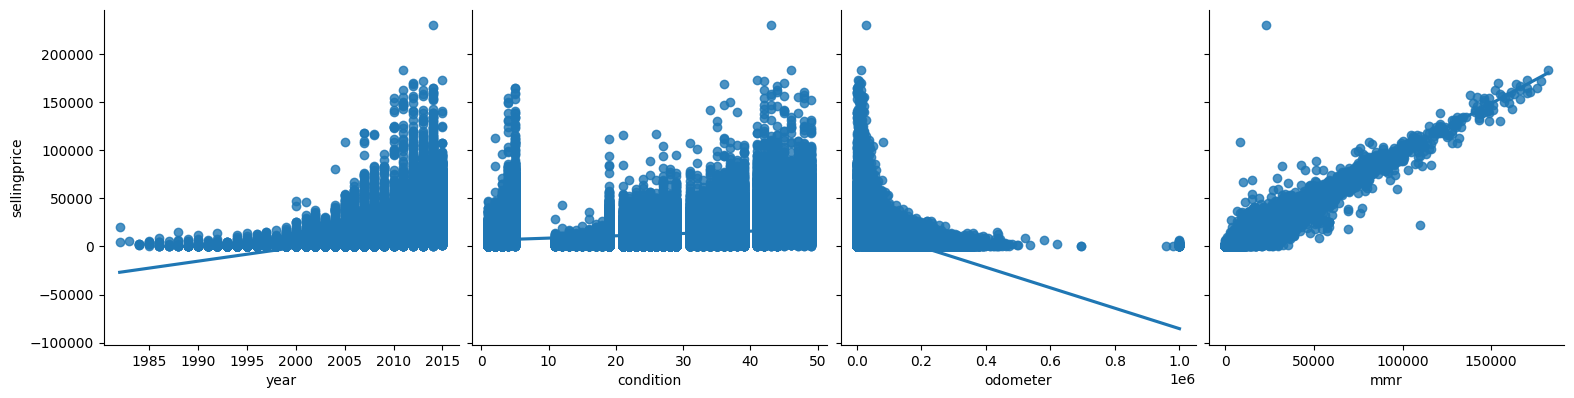

In [7]:
# 檢查特徵對sellingprice是否呈線性關係
sns.pairplot(
    data=df,
    x_vars=['year', 'condition', 'odometer', 'mmr'],
    y_vars=['sellingprice'],
    kind='reg',
    height=4,
    aspect=1
)
plt.show()

# 建立baseline1

In [8]:
# 拆分訓練集與測試集
from sklearn.model_selection import train_test_split

X = df[['year', 'condition', 'odometer', 'mmr']]
y = df['sellingprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 43) #Removed stratify=y_train

display(X_train.shape)
display(X_test.shape)
display(X_val.shape)


(402362, 4)

(111768, 4)

(44707, 4)

In [9]:
#僅部分特徵與sellingprice呈現線性關係
#使用 Logistic Regression 模型，進行交叉驗證以評估準確度
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

rfc = DecisionTreeRegressor()

# 使用交叉驗證評估均方誤差
mse_scores = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # 转换为正的 MSE 值
print("Mean MSE:", mse_scores.mean())
print("Std MSE:", mse_scores.std())

# 使用交叉驗證評估R² 分数
r2_scores = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=5, scoring='r2')
print("Mean R²:", r2_scores.mean())
print("Std R²:", r2_scores.std())


Mean MSE: 4696471.94663419
Std MSE: 148080.17852877895
Mean R²: 0.9508355197360157
Std R²: 0.0020233639232566385


MSE
*   MSE 是預測值與實際值之間差值的平方的平均值。其單位與目標變量（sellingprice）的平方單位一致。
*   數值較大，表明預測值與實際值之間仍有一定的誤差。
*   可能是價格範圍的落差大所造成
*   MSE 標準差較小表示模型在不同的交叉驗證中誤差分布較穩定

R²
*   R² 分數接近 1，總變異中有95.08%可被自變數解釋，擬合效果良好。
*   R² 的標準差非常小，說明模型在交叉驗證的不同折中的性能非常穩定，表現一致。









# EDA

1.檢查離群值

2.查看非數值欄位與sellingprice間的關係

<Axes: >

<Figure size 1200x1000 with 0 Axes>

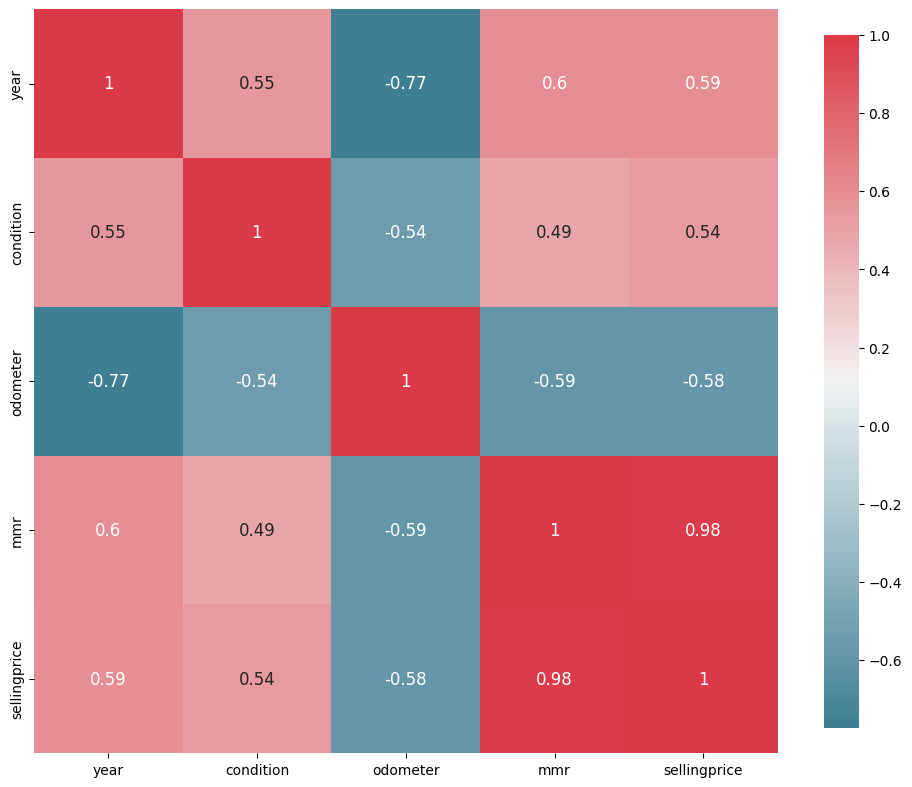

In [15]:
#使用 Pearson 係數計算相關性
corr = df[['year', 'condition', 'odometer', 'mmr','sellingprice']].corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
plt.figure(figsize=(12, 10))
sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True,
        annot_kws = { 'fontsize' : 12 }
)

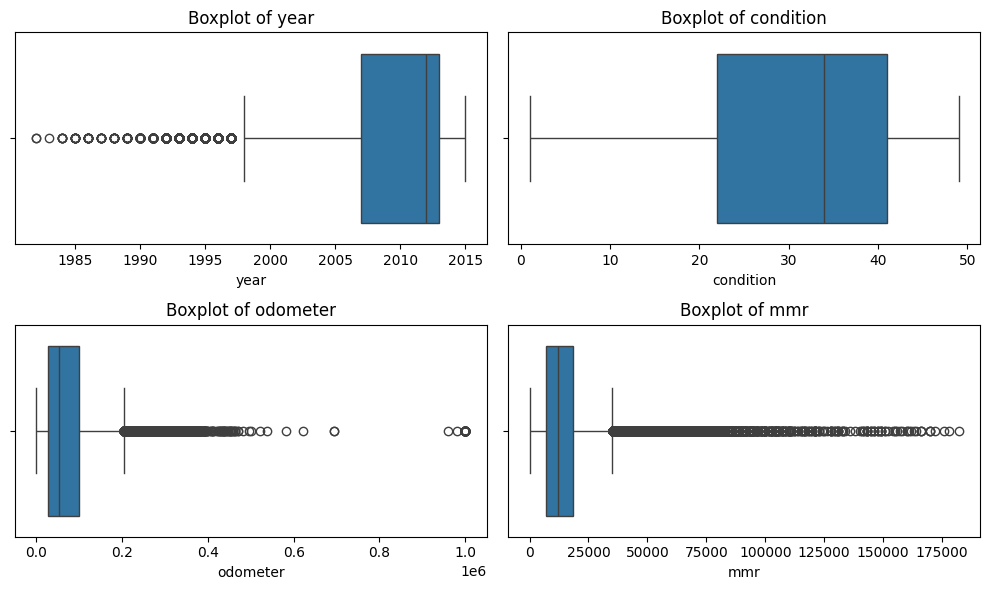

In [19]:
#檢查離群值

# 繪製相形圖
def plot_boxplots(df, columns):
    plt.figure(figsize=(10, 6))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 2, i)  #建立 2x2 的子圖
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

# 需要检查离群值的列
columns_to_check = ['year', 'condition', 'odometer', 'mmr']
plot_boxplots(df, columns_to_check)

year的離群值可能代表骨董車，先保留

mmr跟售價成高度正相關，先保留

odometer的離群值代表超高的里程數，可能為異常值，先移除


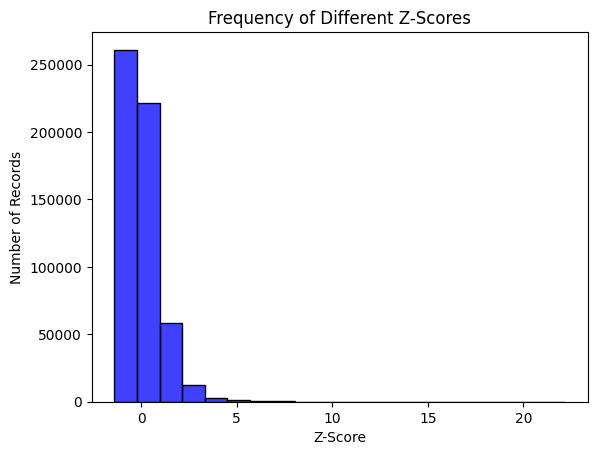

In [31]:
#檢測sellingprice的異常值，大於3個標準差可視為極端值
from scipy.stats import zscore
df['z_score'] = zscore(df['sellingprice'])

sns.histplot(df['z_score'], bins=20, kde=False, color="blue")
plt.title('Frequency of Different Z-Scores')
plt.xlabel('Z-Score')
plt.ylabel('Number of Records')
plt.show()

In [32]:
# 設定標準差範圍
threshold = 5

# 計算極端值的數量和比例
outliers = df[df['z_score'].abs() > threshold]
outlier_count = len(outliers)
total_count = len(df)
outlier_ratio = outlier_count / total_count

print(f"極端值數量: {outlier_count}")
print(f"極端值比例: {outlier_ratio:.2%}")

極端值數量: 1453
極端值比例: 0.26%


In [33]:
# 去除 z-score 超过 5 的数据
df = df[df['z_score'].abs() < 5]

average = df['sellingprice'].mean()
print(f"平均數: {average}")

median = df['sellingprice'].median()
print(f"中位數: {median}")

平均數: 13438.094240236533
中位數: 12100.0


<Axes: xlabel='odometer'>

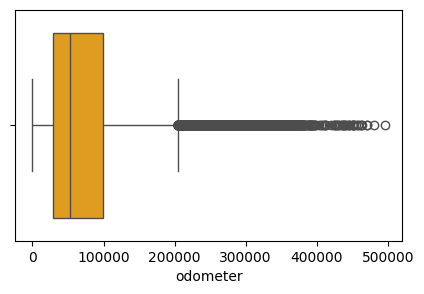

In [34]:
#嘗試移除里程數大於500000的值
df = df[df["odometer"] < 500000]
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x="odometer", color="orange")

In [14]:
#查看有哪些品牌
df['make'].unique().tolist()

['Kia',
 'BMW',
 'Volvo',
 'Nissan',
 'Chevrolet',
 'Audi',
 'Ford',
 'Hyundai',
 'Buick',
 'Cadillac',
 'Acura',
 'Lexus',
 'Infiniti',
 'Jeep',
 'Mercedes-Benz',
 'Mitsubishi',
 'Mazda',
 'MINI',
 'Land Rover',
 'Lincoln',
 'lincoln',
 'Jaguar',
 'Volkswagen',
 'Toyota',
 'Subaru',
 'Scion',
 'Porsche',
 'bmw',
 'Dodge',
 'FIAT',
 'Chrysler',
 'ford',
 'Ferrari',
 'Honda',
 'GMC',
 'mitsubishi',
 'Ram',
 'smart',
 'chevrolet',
 'Bentley',
 'chrysler',
 'pontiac',
 'Pontiac',
 'Saturn',
 'Maserati',
 'Mercury',
 'HUMMER',
 'landrover',
 'cadillac',
 'land rover',
 'mercedes',
 'mazda',
 'toyota',
 'lexus',
 'gmc truck',
 'honda',
 'nissan',
 'porsche',
 'Saab',
 'Suzuki',
 'dodge',
 'subaru',
 'Oldsmobile',
 'oldsmobile',
 'hyundai',
 'jeep',
 'Isuzu',
 'dodge tk',
 'Geo',
 'acura',
 'volkswagen',
 'suzuki',
 'kia',
 'audi',
 'Rolls-Royce',
 'gmc',
 'maserati',
 'mazda tk',
 'mercury',
 'buick',
 'hyundai tk',
 'mercedes-b',
 'vw',
 'Daewoo',
 'chev truck',
 'ford tk',
 'plymouth',
 '

In [3]:
#將所有開頭字母改為大寫
import re
# 建立轉換字典
make_labels_dict = {
    make: make.title()
    for make in df['make'].dropna().unique()
    if not re.search(r'[A-Z]', make)
}

# 更新 'make' 欄位
df['make'] = df['make'].apply(lambda x: make_labels_dict.get(x, x))

In [5]:
#將相同品牌的名稱修改為一致
make_label_2={
    'Bmw':'BMW',
    'Ford Tk':'Ford Truck',
    'Gmc':'GMC',
    'Gmc Truck':'GMC Truck',
    'Landrover':'Land Rover',
    'Mercedes-B':'Mercedes-Benz',
    'Mercedes':'Mercedes-Benz',
    'Vw':'Volkswagen',
}

df['make']=df['make'].apply(lambda x:make_label_2[x] if x in make_label_2 else x)

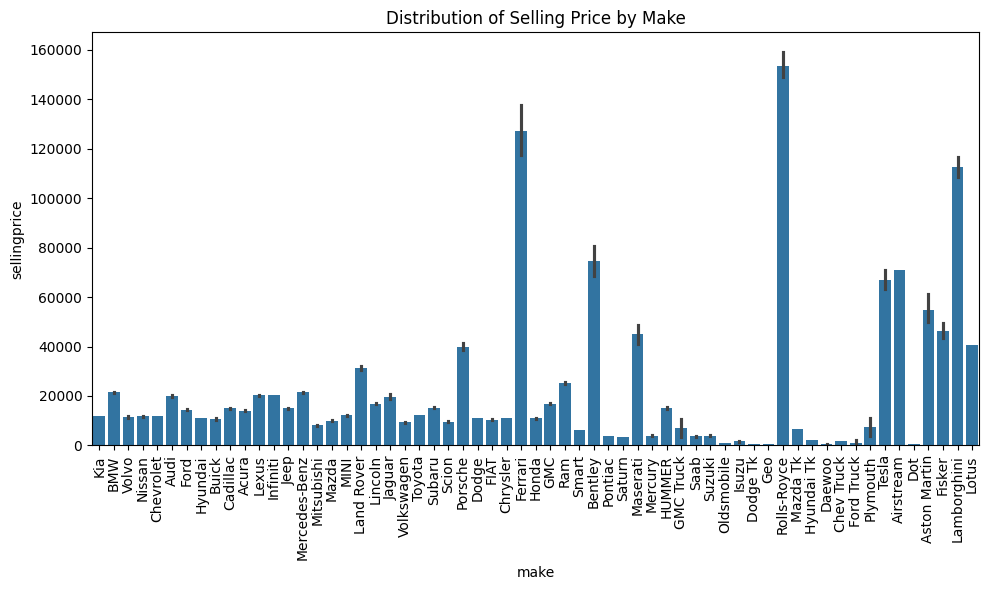

In [8]:
#查看各品牌的平均銷售價格
plt.figure(figsize=(10, 6))  # 調整圖表尺寸
sns.barplot(x='make', y='sellingprice', data=df)
plt.xticks(rotation=90)  # 將標籤旋轉 90 度
plt.title('Distribution of Selling Price by Make')
plt.tight_layout()  # 自動調整布局避免標籤溢出
plt.show()

In [13]:
#查看車輛外觀有哪些顏色
df["color"].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime', '4802', '9410', '1167', '2172', '14872', '12655', '15719',
       '6388', '16633', '11034', '2711', '6864', '339', '18384', '9887',
       '9837', '20379', '20627', '721', '6158', '2817', '5705', '18561',
       '2846', '9562', '5001'], dtype=object)

<ipython-input-21-98d3ff659aee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_counts.index, y=color_counts.values, palette='viridis')


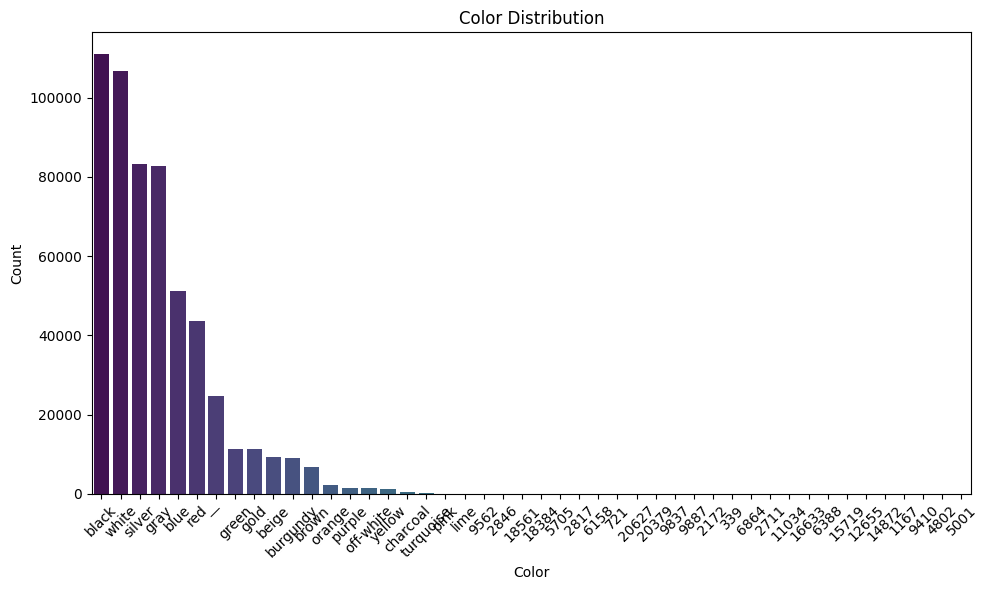

In [21]:
#統計顏色個數
color_counts = df['color'].value_counts()
#繪製長條圖
plt.figure(figsize=(10, 6))
sns.barplot(x=color_counts.index, y=color_counts.values, palette='viridis')
plt.title('Color Distribution')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)  #旋轉標籤
plt.tight_layout()
plt.show()

In [13]:
#顏色為數字的筆數非常少，改為Other
import re
df['color'] = df['color'].apply(lambda x: 'Other' if re.search(r'[1-9]', str(x)) else x)
#"-"顏色不明，也改為None
df['color']=df['Other'].replace('—','Other')


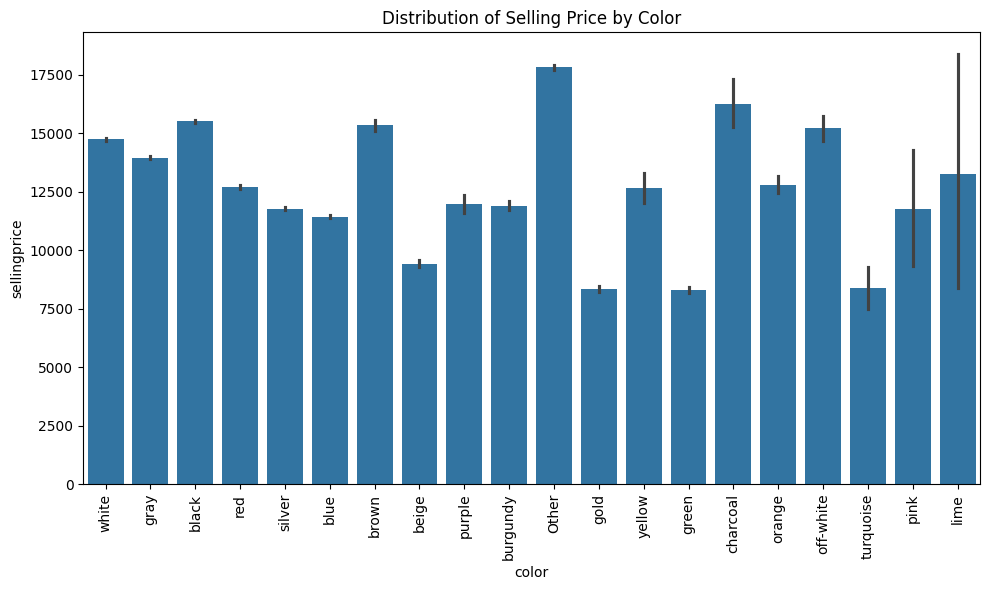

In [18]:
#查看顏色跟售價的關係
plt.figure(figsize=(10, 6))  # 調整圖表尺寸
sns.barplot(x='color', y='sellingprice', data=df)
plt.xticks(rotation=90)  # 將標籤旋轉 90 度
plt.title('Distribution of Selling Price by Color')
plt.tight_layout()  # 自動調整布局避免標籤溢出
plt.show()

In [4]:
df["body"].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'Navitgation', 'van', 'regular-cab',
       'g sedan', 'g coupe', 'hatchback', 'king cab', 'supercrew',
       'g convertible', 'coupe', 'crew cab', 'wagon', 'double cab',
       'e-series van', 'regular cab', 'quad cab', 'g37 convertible',
       'supercab', 'exten

<Axes: title={'center': 'condition vs sellingprice'}, xlabel='condition', ylabel='sellingprice'>

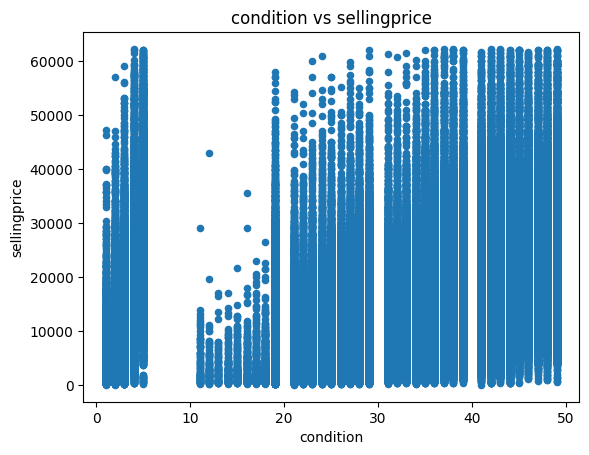

In [35]:
#查看condition
df.plot.scatter(x='condition',y='sellingprice',title='condition vs sellingprice')

Condition是車輛的評分，上圖可以觀察到以下情況:

1.售價在1~5之間呈現正相關

2.在10~50之間也呈現正相關

推測1-5分的評價應該對應10-50


<Axes: title={'center': 'condition vs sellingprice'}, xlabel='condition', ylabel='sellingprice'>

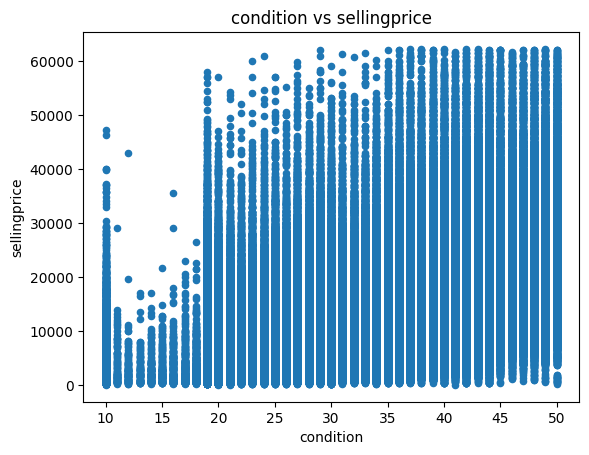

In [36]:
#對condition的評分修改成相應的分數
df['condition']=df['condition'].apply(lambda x:x*10 if x<=5 else x)
df.plot.scatter(x='condition',y='sellingprice',title='condition vs sellingprice')

# 特徵工程

透過出廠年份跟銷售時間，查看其車年齡

<Axes: title={'center': 'car_age vs sellingprice'}, xlabel='car_age', ylabel='sellingprice'>

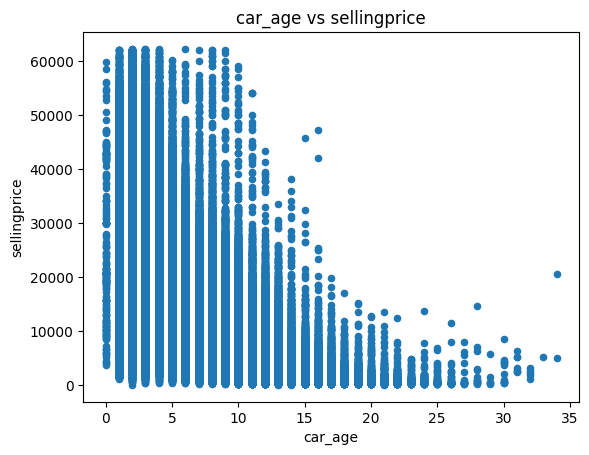

In [37]:
df_copy = df.copy()
#新增車齡
# 去掉時區部分，保留日期時間字串
df_copy['saledate_clean'] = df_copy['saledate'].str.extract(r'(.*) GMT')

# 轉換為 datetime 格式
df_copy['saledate_clean'] = pd.to_datetime(df_copy['saledate_clean'], format='%a %b %d %Y %H:%M:%S')

# 取出年份
df_copy['saleyear'] = df_copy['saledate_clean'].dt.year

#Convert to datetime
df_copy['car_age']=df_copy['saleyear']-df_copy['year']+1
df_copy.plot.scatter(x='car_age',y='sellingprice',title='car_age vs sellingprice')


由上圖可以觀察到車齡越低，售價越高

# 模型訓練

In [38]:
# 拆分訓練集與測試集
from sklearn.model_selection import train_test_split

X = df_copy[['year', 'condition', 'odometer', 'mmr', 'car_age']]
y = df_copy['sellingprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 43) #Removed stratify=y_train

display(X_train.shape)
display(X_test.shape)
display(X_val.shape)


(401257, 5)

(111461, 5)

(44585, 5)

In [19]:
#使用 Logistic Regression 模型，進行交叉驗證以評估準確度
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# 初始化模型
dtr = DecisionTreeRegressor()

# 在訓練集上擬合模型
dtr.fit(X_train, y_train)

# 使用驗證集進行預測
y_val_pred = dtr.predict(X_val)

# 計算均方誤差 (MSE)
mse = mean_squared_error(y_val, y_val_pred)
print("Validation MSE:", mse)

# 計算 R² 分數
r2 = r2_score(y_val, y_val_pred)
print("Validation R²:", r2)


Validation MSE: 4333324.14922059
Validation R²: 0.9470164323427316


**以下使用其他模型來評估**

1.RandomForest

2.xgboost

In [20]:
from sklearn.ensemble import RandomForestRegressor

# 初始化隨機森林模型
rfc = RandomForestRegressor(n_estimators=50, random_state=42)

# 在訓練集上擬合模型
rfc.fit(X_train, y_train)

# 使用驗證集進行預測
y_val_pred = rfc.predict(X_val)

# 計算均方誤差 (MSE)
mse = mean_squared_error(y_val, y_val_pred)
print("Validation MSE (Random Forest):", mse)

# 計算 R² 分數
r2 = r2_score(y_val, y_val_pred)
print("Validation R² (Random Forest):", r2)


Validation MSE (Random Forest): 2331380.4342815927
Validation R² (Random Forest): 0.9714942042826848


In [16]:
from xgboost import XGBRegressor

# 初始化 XGBoost 模型
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# 在訓練集上擬合模型
xgb.fit(X_train, y_train)

# 使用驗證集進行預測
y_val_pred = xgb.predict(X_val)

# 計算均方誤差 (MSE)
mse = mean_squared_error(y_val, y_val_pred)
print("Validation MSE (XGBoost):", mse)

# 計算 R² 分數
r2 = r2_score(y_val, y_val_pred)
print("Validation R² (XGBoost):", r2)

Validation MSE (XGBoost): 2086931.2759013001
Validation R² (XGBoost): 0.9744830848916127


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# 設定超參數範圍
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# 初始化模型
rf = RandomForestRegressor(random_state=42)

# 使用 RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, scoring='neg_mean_squared_error', cv=3, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# 輸出最佳參數
print("Best Parameters:", random_search.best_params_)

# 使用最佳模型進行預測
best_model = random_search.best_estimator_
y_val_pred = best_model.predict(X_val)

# 超參數優化

In [39]:

from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# 初始化模型
xgb = XGBRegressor(n_estimators=100, max_depth=7, learning_rate=0.1, random_state=42, subsample=1.0, colsample_bytree=1.0,)

# 模型訓練，驗證集的性能不再提升時停止訓練，防止過擬合
xgb.fit(
    X_train, y_train
)

# 預測
y_val_pred = xgb.predict(X_val)

# 評估
mse = mean_squared_error(y_val, y_val_pred)
print("Validation MSE:", mse)
rmse = np.sqrt(mse)
print("Validation RMSE:", rmse)
mae = mean_absolute_error(y_val, y_val_pred)
print("Validation MAE:", mae)
r2 = r2_score(y_val, y_val_pred)
print("Validation R²:", r2)

Validation MSE: 2082940.3960045166
Validation RMSE: 1443.239549071642
Validation MAE: 927.8314698242722
Validation R²: 0.9745318813923457


In [40]:
# 測試集評估
y_test_pred = xgb.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test R²:", test_r2)

Test MSE: 2150935.0108918906
Test RMSE: 1466.6066312723021
Test MAE: 937.6525317831811
Test R²: 0.9740549358952457


**模型的穩定性:**

測試集的R²與驗證集非常接近，說明模型在未見過的數據上表現穩定。
測試集和驗證集的

MSE差異很小，顯示模型在不同數據集上的誤差表現一致，表明模型具有良好的泛化能力。

驗證集和測試集的RMSE非常接近，顯示模型在未見數據上的表現穩定

**模型的準確性:**

R²≈0.974 表示模型能解釋超過 97% 的目標變量變異量，說明模型擬合效果良好。

MSE≈2,100,000，由於資料範圍較大，MSE值受到影響也較大

sellingprice的平均數為13439;中位數為12100，與RMSE接近，代表模型的誤差相對較小

MAE略小於RMSE，差距表明有一定程度的極端影響了RMSE


